In [ ]:
#Hipótesis. Dado que el surf nació en la costa oeste de EEUU, se plantea que el mayor número de ataques de tiburones a surfistas se ha producido en la costa oeste de EEUU.

#Buscar:
#Filtrar el DataFrame para la actividad surf
#Filtrar el DataFrame para la costa oeste. Country == USA  & Areas: Alaska, Hawai, California, Oregon y Washington
#La suma del número de casos de 'Surfing' de la costa oeste debe ser mayor a la suma de casos de 'Surfing' en otros países u otras áreas de EEUU
#Puede ser interesante buscar la moda de Area por Country en Surfing
#Puede ampliarse para saber si verano es la época del año con mayor número de ataques, ya que agosto y septiembre son los mejores meses para surfear

In [ ]:
#Limpieza de datos.

#Crear un DataFrame a partir del DataFrame original con las columnas más interesantes para analizar la hipótesis
#Columnas de interés: Case Number, Country, Area, Date, Year, Location, Activity, 'Injury', 'Fatal (Y/N)'

#Renombrar las columnas para que no tengan espacio en el nombre

#Revisar los datos duplicados en Case Number, si no están duplicados en todos los campos, asignar una letra al final. O eliminar los 32 registros.

#Eliminar en los países los '?'

#En Países, reescribir a primera en mayúscula y el resto en minúscula

#Agrupar por continente

#Revisar los años. Si los dos últimos dígitos de 'Year' no coincide con los dos últimos dígitos de 'Date', sobreescribir 'Date' con el año.

In [127]:
#Import modules

import pandas as pd
import numpy as np
import re

In [128]:
df = pd.read_csv('input/GSAF5.csv', engine = 'python')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [114]:
#Conocer la tabla. 5992 registros y 24 columnas
df.shape

(5992, 24)

In [25]:
#Revisar los nombres de las columnas
col = df.columns #Conocer las columnas que hay. Algunos nombres tienen espacio al final
print(col)

def check_columns(name): #Función para eliminar el espacio al final de un nombre
    return name.rstrip() if name[-1] == ' ' else name

df.rename(mapper=check_columns, axis='columns')

#No ha quitado el espacio en el nombre :(
#Intentar con apply

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,NaN,NaN
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,NaN,NaN
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaN,NaN
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8�N, 79�W",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaN,NaN


In [20]:
def check_columns(name):
    return name.rstrip() if name[-1] == ' ' else name

df.rename(mapper=check_columns, axis='columns')

#La función funciona porque si lo añado a una lista, los nombres ya no tienen espacio. Sin embargo, como columna en df.columns sigue teniendo espacio

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,NaN,NaN
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,NaN,NaN
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaN,NaN
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8�N, 79�W",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaN,NaN


In [30]:
#Eliminar en los países los '?'
df.Country.value_counts()

USA                          2116
AUSTRALIA                    1279
SOUTH AFRICA                  565
PAPUA NEW GUINEA              133
NEW ZEALAND                   125
                             ... 
KOREA                           1
KUWAIT                          1
INDIAN OCEAN?                   1
SOLOMON ISLANDS / VANUATU       1
BRITISH VIRGIN ISLANDS          1
Name: Country, Length: 203, dtype: int64

In [115]:
[df.Country.str.endswith('?')]

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 5987    False
 5988    False
 5989    False
 5990    False
 5991    False
 Name: Country, Length: 5992, dtype: object]

In [87]:
#Reescribir el nombre en title, excepto USA y excepto NaN
df[(df["Country"].notnull()[(df["Country"] != "USA")][df.Country.str.title()]]

SyntaxError: invalid syntax (<ipython-input-87-c9bc1107f08a>, line 2)

In [132]:
df.Country.dtypes

dtype('O')

In [142]:
def mark(country):
    match = re.search(r'\?', country)
    if match:
        return match[:-1]
    else:
        return country

df["Country"].apply(mark)

TypeError: expected string or bytes-like object

In [160]:
def mark(country):
    if re.search(r'\?', country):
        return country[:-1]
    elif re.search(r'(\w+)\s(\w+)', country):
        return country
    elif re.search(r'(\w+)\s(\w+)\s(\w+)', country):
        return country
    elif re.search(r'(\w+)\s(\w+)\s(\w+)\s\((\w+)\)', country):
        return country
    elif re.search(r'(\w+)\s\((\w+)\)', country):
        return country
    elif re.search(r'(\w+)\s\&\s(\w+)', country):
        return country
    elif re.search(r'(\w+)\.\s(\w+)', country):
        return country
    elif re.search(r'(\w+)\s\/\s(\w+)', country):
        return country
    elif re.search(r'(\w+)\s\/\s(\w+)\s(\w+)', country):
        return country
    elif re.search(r'\s(\w+)', country):
        return country
    elif re.search(r'(\w+)\-(\w+)\s(\w+)', country):
        return country
    elif re.search(r'(\w+)\s(\w+)\s\/\s(\w+)\s(\w+)', country):
        return country
    elif re.search(r'(\w+)\s(\w+)\s\/\s(\w+)', country):
        return country
    else:
        return country

df["Country"].apply(mark)

TypeError: expected string or bytes-like object

In [170]:
#Reescribir el nombre en title, excepto USA y excepto NaN

#1. Asignar a los valores nulos un 'Meridiano'

#df["Country"].isnull().value_counts() # 43 False
df["Country"].fillna(method='ffill')
#df_n = df[(df["Country"] == 'Meridiano')] #Contar el número de valores meridiano
df[(df["Country"] == 0)]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23


In [171]:
#Revisar los años. Si los dos últimos dígitos de 'Year' no coincide con los dos últimos dígitos de 'Date', sobreescribir 'Date' con el año.

#df.isnull().sum() #Comprobar si hay valores nulos en 'Year'. No hay.
#db = df[(df['Year'] == 0)] #Comprobar que hay años a 0, tomamos esto como dato erróneo
#db['Year'].value_counts() #Hay 124 registros con año 0. Estos años se toman de Case Number


In [173]:
#Creación de un nuevo DataFrame solo con las columnas de interés para el estudio
shark_df = df[['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Investigator or Source']]
shark_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Investigator or Source
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,"Orlando Sentinel, 9/19/2016"
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,"Orlando Sentinel, 9/19/2016"
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,"Orlando Sentinel, 9/19/2016"
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,"The Age, 9/18/2016"
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,"The Age, 9/16/2016"


In [180]:
#Filtrar el DataFrame solo por la actividad 'Surfing'

shark_df = shark_df[df.Activity == 'Surfing']
shark_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Investigator or Source
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,"Orlando Sentinel, 9/19/2016"
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,"Orlando Sentinel, 9/19/2016"
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,"Orlando Sentinel, 9/19/2016"
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,"The Age, 9/18/2016"
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,"The Age, 9/16/2016"


In [179]:
shark_df.shape

(904, 14)

In [186]:
#Conteo de ataques de tiburones por países
shark_df.Country.value_counts()

USA                           534
AUSTRALIA                     170
SOUTH AFRICA                   93
BRAZIL                         35
REUNION                        20
NEW ZEALAND                    12
MEXICO                          6
INDONESIA                       5
ECUADOR                         4
COSTA RICA                      3
EL SALVADOR                     2
JAPAN                           2
NEW CALEDONIA                   2
FIJI                            2
VENEZUELA                       2
CANADA                          1
ANGOLA                          1
BAHAMAS                         1
DOMINICAN REPUBLIC              1
URUGUAY                         1
FRENCH POLYNESIA                1
SCOTLAND                        1
UNITED ARAB EMIRATES (UAE)      1
OKINAWA                         1
MOZAMBIQUE                      1
GREECE                          1
MEXICO                          1
Name: Country, dtype: int64

In [200]:
#Seleccionar las regiones de la costa oeste de USA. Areas: Alaska, Hawai, California, Oregon y Washington

surf_west = shark_df.loc[(shark_df.Area.isin(('Alaska', 'Hawai', 'California', 'Oregon', 'Washington')))]
surf_west.shape

#Casos de ataques de tiburón a surfistas en la costa oeste de USA = 94

(94, 14)

In [203]:
surf_out = shark_df.loc[(~shark_df.Area.isin(('Alaska', 'Hawai', 'California', 'Oregon', 'Washington')))]
surf_out.shape

#Casos de ataques de tiburón a surfistas en otros lugares del mundo = 810

(810, 14)

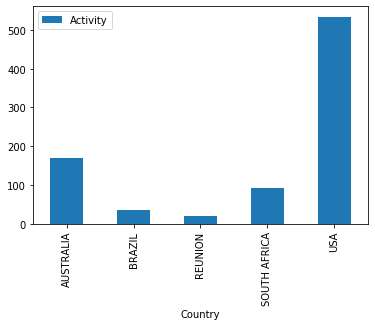

In [235]:
#Buscar que es la región que mayor número de ataques tiene. 
#Comparar con USA costa este, con Australia
%matplotlib inline
shark_df.groupby('Country').agg({'Activity':'count'}).nlargest(5, ['Activity']).sort_values('Country').plot.bar()

#En el gráfico se muestra que